In [1]:
import k
from mp_api.client import MPRester
API_KEY = "4IeHY5jVcrgiKXNuAo6Jgs7yC0Z3hsli"
try:


    with MPRester(API_KEY) as mpr:
        # Query for Li-based cathode materials with high energy density
        docs = mpr.materials.insertion_electrodes.search(
            working_ion="Li",
            fields=[
                "battery_id", "formula_discharge", "average_voltage"
                , "energy_grav", "energy_vol", "capacity_grav", "capacity_vol", "stability_charge", "fracA_charge", "stability_charge", "max_delta_volume", "stability_discharge", "fracA_discharge"
            ]
        )

        # Convert to pandas for research analysis
        import pandas as pd
        df = pd.DataFrame([doc.dict() for doc in docs])
        print(df)

except Exception as e:
    print(f"An error occurred: {e}")


import pandas as pd

df = pd.DataFrame([doc.dict() for doc in docs])

df.head()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Retrieving InsertionElectrodeDoc documents: 100%|██████████| 2774/2774 [00:00<00:00, 3634.10it/s]


        battery_id formula_discharge  max_delta_volume  average_voltage  \
0         mp-28_Li             Li3Ce          2.951183        -0.444846   
1       mp-2074_Li             Li3Sb          1.569237         1.015953   
2     mp-568806_Li              LiC6          0.025414         0.084405   
3     mp-573471_Li           Li22Sn5          0.009450        -0.362516   
4      mp-22902_Li              LiBi          0.368255         0.796796   
...            ...               ...               ...              ...   
2769  mp-770930_Li         Li2NbV3O8          0.042691         3.136507   
2770  mp-771133_Li      Li4Mn5Cr3O16          0.089148         3.893608   
2771  mp-771020_Li      Li4Co5Te3O16          0.184518         3.932885   
2772  mp-771093_Li     Li3Cr10Fe5O24          0.000458         4.820463   
2773  mp-771188_Li     Li8Mn13Fe3O32          0.040725         4.227074   

      capacity_grav  capacity_vol  energy_grav   energy_vol  fracA_charge  \
0        499.595769   

,battery_id,formula_discharge,max_delta_volume,average_voltage,capacity_grav,capacity_vol,energy_grav,energy_vol,fracA_charge,fracA_discharge,stability_charge,stability_discharge,fields_not_requested
0,mp-28_Li,Li3Ce,2.951183,-0.444846,499.595769,1295.168213,-222.242937,-576.149771,0.000000,0.750000,0.000000,0.333634,"[builder_meta, battery_type, thermo_type, batt..."
1,mp-2074_Li,Li3Sb,1.569237,1.015953,563.913254,1890.293779,572.909146,1920.448911,0.000000,0.750000,0.328351,0.000000,"[builder_meta, battery_type, thermo_type, batt..."
2,mp-568806_Li,LiC6,0.025414,0.084405,339.236925,734.096706,28.633212,61.961259,0.000000,0.142857,0.011936,0.002406,"[builder_meta, battery_type, thermo_type, batt..."
3,mp-573471_Li,Li22Sn5,0.009450,-0.362516,26.936090,69.584747,-9.764758,-25.225570,0.809524,0.814815,0.000000,0.010070,"[builder_meta, battery_type, thermo_type, batt..."
4,mp-22902_Li,LiBi,0.368255,0.796796,124.126099,923.538664,98.903144,735.871648,0.000000,0.500000,0.049545,0.000000,"[builder_meta, battery_type, thermo_type, batt..."


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Select numerical columns for clustering (update with your actual column names)
features = ['capacity_grav', 'average_voltage']
# Step 1:
X_custom = df[features].values
# Scale the data (crucial for KMeans/DBSCAN)
X = StandardScaler().fit_transform(X_custom)

print("Data ready for clustering.")

Data ready for clustering.


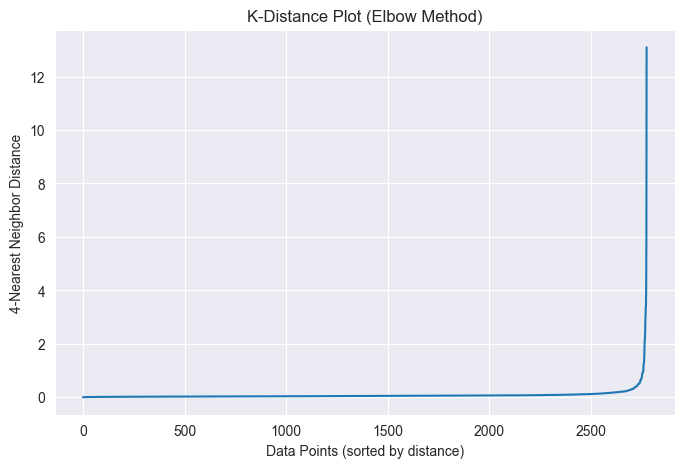

In [3]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# 1. Define k (typically min_samples - 1)
k = 4

# 2. Compute k-nearest neighbors
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# 3. Sort distances (only the distance to the kth neighbor)
# distances[:, k-1] gives the distance to the kth neighbor for each point
sorted_distances = np.sort(distances[:, k-1], axis=0)

# 4. Plot the "K-distance" graph
plt.figure(figsize=(8, 5))
plt.plot(sorted_distances)
plt.title("K-Distance Plot (Elbow Method)")
plt.xlabel("Data Points (sorted by distance)")
plt.ylabel(f"{k}-Nearest Neighbor Distance")
plt.grid(True)
plt.show()
